In [38]:
import sys
sys.path.insert(0, "C:\\Users\\matth\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import matplotlib.pyplot as plt
from math import pi

Each spatiotemporal solution to the KSE is a scalar spatiotemporal velocity field $u(t,x)$ which satisfies the equation
\begin{equation}
F(u) = u_t + u_{xx}+ u_{xxxx} + \frac{1}{2}\partial_x u^2 = 0
\end{equation}
$u(t, x)$

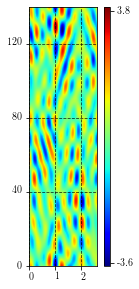

In [7]:
OrbitKS(nonzero_parameters=True).plot()

state $\equiv \phi$

In [263]:
from orbithunter.core import Orbit
import numpy as np

class OrbitHN(Orbit):
    def __init__(self, state=None, basis='field', parameters=(0, 0), **kwargs):
        # state is numpy array
        self.state = state
        self.T = parameters[0]
        self.basis = 'field'

    def dae(self, **kwargs):
        F = np.roll(self.state, 1) + 1.4*(self.state**2) - 0.3*np.roll(self.state, -1) - 1
        return OrbitHN(state=F.ravel(), parameters=(len(F), 1))

    def jacobian(self, **kwargs):
        J = 2*1.4*np.diag(self.state.ravel()) + np.roll(np.eye(len(self.state)), 1, axis=1)-0.3*np.roll(np.eye(len(self.state)), -1, axis=1)
        return J
    
    def dae_matrep(self, **kwargs):
        J = 1.4*np.diag(self.state.ravel()) + np.roll(np.eye(len(self.state)), 1, axis=1)-0.3*np.roll(np.eye(len(self.state)), -1, axis=1)
        return np.dot(J, self.state.ravel()) - 1

    def residual(self, **kwargs):
        F = self.dae().state
        return 0.5 * F.dot(F)

    def from_numpy_array(self, state, **kwargs):
        return OrbitHN(state=state.ravel(), parameters=(len(state), 1))
    
    def plot(self):
        fig, ax = plt.subplots()
        plt.plot(range(len(self.state)), self.state)
        plt.ylabel('$\phi_{n}$')
        plt.xlabel('$n$')
        plt.plot()
        return None

    @property
    def shape(self):
        return self.state.size

$F_n = \phi_{n+1}+a\phi^{2}_n - b\phi_{n+1} -1 = 0$

$a = 1.4\\
b = 0.3$

$\phi_n = [1, 2, 3, 4, 5] \\
\phi_{n-1} = [5, 1, 2, 3, 4] \\
\phi_{n+1} = [2, 3, 4, 5, 1]$

$\phi_1=1$, $\phi_2=2$

$J x = -F$

In [243]:
np.random.seed(99)
phi = (np.random.rand(16))-0.5
x = OrbitHN(state=phi,parameters=(8, 1))
y = converge(x, method='lstsq', verbose=True, tol=1e-8)


-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 6.671088142745238
Target residual tolerance : 1e-08
Maximum iteration number : 250
Initial guess : OrbitHN({"basis": "field", "parameters": ["0.0"], "field_shape": ["0"]})
-------------------------------------------------------------------------------------------------
#
Stalled. Exiting with residual=2.7365132226114897


In [383]:
a = 1.4
b = 0.3
phi = [-0.70676677,0.63819399]
xnm1, xn = -0.70676677, 0.63819399
for n in range(4):
    xn1 = -a*xn**2 + b*xnm1 + 1
#     print(xn1 + a*xn**2 - b*xnm1 -1)
#     print(xn1, xn, xnm1)
    print(xn1, a*xn**2, -b*xnm1, xn)
    xnm1 = xn
    xn = xn1   
    phi.append(xn1)

0.21776177257903195 0.5702081964209681 0.21203003099999998 0.63819399
1.1250699315645332 0.06638826543546683 -0.191458197 0.21776177257903195
-0.7067667595011631 1.7720952912748726 -0.06532853177370958 1.1250699315645332
0.6381940261992751 0.6993269532700848 -0.33752097946935994 -0.7067667595011631


In [384]:
x.state = np.array(phi)

In [385]:
x.dae().state

array([ 0.1460628 , -1.20188711, -0.63293872,  1.20188709,  0.63293868,
       -0.92452847])

In [386]:
x.state

array([-0.70676677,  0.63819399,  0.21776177,  1.12506993, -0.70676676,
        0.63819403])

In [387]:
-np.roll(x.state, 1) 

array([-0.63819403,  0.70676677, -0.63819399, -0.21776177, -1.12506993,
        0.70676676])

In [388]:
- 1.4*(x.state ** 2) 

array([-0.69932697, -0.5702082 , -0.06638827, -1.77209529, -0.69932695,
       -0.57020826])

In [389]:
+ 0.3*np.roll(x.state, -1) 

array([ 0.1914582 ,  0.06532853,  0.33752098, -0.21203003,  0.19145821,
       -0.21203003])

In [368]:
-np.roll(x.state, 2) - 1.4*(x.state ** 2) + 0.3*np.roll(x.state, -1) +1

array([ 0.27436945, -0.6299496 ,  1.97789948, -1.62231931])

In [369]:
F = -np.roll(x.state, 1) - 1.4*(x.state**2) + 0.3*np.roll(x.state, -1) + 1

In [370]:
F

array([-0.63293871,  1.20188711,  0.63293872, -1.20188709])

In [292]:
x.dae().state

array([ 0.90730816,  0.27219243, -1.97789948,  0.79839887])

In [269]:
xn1

1.1250699315645332

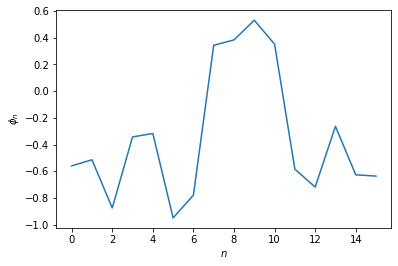

In [270]:
y.orbit.dae().plot()

In [240]:
x = OrbitHN(state=np.array([-1.13135447]), parameters=(1, 1))

In [241]:
x.residual()

1.5304498288667492e-16

In [242]:
y = converge(x, method='lstsq', verbose=True, tol=1e-8)

In [234]:
y = converge(x, method='solve', verbose=True)


-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 1.5304498288667492e-16
Target residual tolerance : 0.0
Maximum iteration number : 0
Initial guess : OrbitHN({"basis": "field", "parameters": ["0.0"], "field_shape": ["0"]})
-------------------------------------------------------------------------------------------------
#
Insufficient residual decrease, exiting with residual=0.0


In [235]:
x.dae().state

array([-1.7495427e-08])

In [220]:
x.dae_matrep()

array([-0.93900595, -0.72598942, -1.31665118, -0.48223911, -0.6609638 ,
       -1.28876459, -1.41565019, -0.16098067, -1.02018164, -0.53688599,
       -0.50337703, -1.11824737, -1.05885298, -0.53423534, -0.84519478,
       -0.94110416])

In [203]:
y.orbit.residual()

3.6419395268150394

In [204]:
x.residual()

3.7604912422280123

In [205]:
def jacobian(self, **kwargs):
    J = 2*1.4*np.diag(self.state.ravel()) + np.roll(np.eye(len(self.state)), 1, axis=1)-0.3*np.roll(np.eye(len(self.state)), -1, axis=1)
    return J

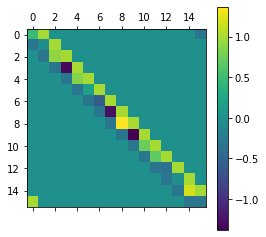

In [224]:
plt.matshow(x.jacobian())
plt.colorbar()

In [176]:
np.random.seed(2)
self = OrbitHN(state=np.random.rand(4)-0.5, parameters=(4, 1))

In [179]:
x.dae().state

array([6., 6., 6., 6., 6., 6., 6., 6.])

In [180]:
J = 2*1.4*np.diag(self.state.ravel()) + np.roll(np.eye(len(self.state)), 1, axis=1)-0.3*np.roll(np.eye(len(self.state)), -1, axis=1)
J

array([[-0.17921427,  1.        ,  0.        , -0.3       ],
       [-0.3       , -1.32740655,  1.        ,  0.        ],
       [ 0.        , -0.3       ,  0.13905494,  1.        ],
       [ 1.        ,  0.        , -0.3       , -0.1810973 ]])

In [112]:
J = 1.4*np.diag(self.state.ravel()) + np.roll(np.eye(len(self.state)), 1, axis=1)-0.3*np.roll(np.eye(len(self.state)), -1, axis=1)
np.dot(J, self.state.ravel()) - 1

array([-1.44893517, -0.61649168, -0.91900257, -1.07304737])

In [115]:
F = np.roll(self.state, -1) + 1.4*(self.state**2) - 0.3*np.roll(self.state, 1) - 1
F

array([-1.44893517, -0.61649168, -0.91900257, -1.07304737])

In [88]:
np.roll(np.eye(8), 1, axis=1)

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0.]])

In [29]:
-0.3*np.roll(np.eye(8), -1, axis=1)

array([[-0. , -0. , -0. , -0. , -0. , -0. , -0. , -0.3],
       [-0.3, -0. , -0. , -0. , -0. , -0. , -0. , -0. ],
       [-0. , -0.3, -0. , -0. , -0. , -0. , -0. , -0. ],
       [-0. , -0. , -0.3, -0. , -0. , -0. , -0. , -0. ],
       [-0. , -0. , -0. , -0.3, -0. , -0. , -0. , -0. ],
       [-0. , -0. , -0. , -0. , -0.3, -0. , -0. , -0. ],
       [-0. , -0. , -0. , -0. , -0. , -0.3, -0. , -0. ],
       [-0. , -0. , -0. , -0. , -0. , -0. , -0.3, -0. ]])

[]

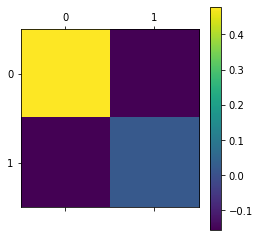

In [23]:
plt.matshow(np.log10(np.abs(x.jacobian())))
plt.colorbar()
plt.plot()

In [18]:
x.residual()

5.7025273926460086e-18


-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 5.7025273926460086e-18
Target residual tolerance : 0.0
Maximum iteration number : 0
Initial guess : OrbitHN({"basis": "field", "parameters": ["0.0"], "field_shape": ["0"]})
-------------------------------------------------------------------------------------------------
#
Insufficient residual decrease, exiting with residual=6.254454242396983e-18


In [14]:
np.random.seed(99)
phi = (np.random.rand(2))-0.5
x = OrbitHN(state=np.array([-.1]), parameters=(1, 1))
y = converge(x, method='solve', verbose=True)


-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 0.5575680000000001
Target residual tolerance : 0.0
Maximum iteration number : 0
Initial guess : OrbitHN({"basis": "field", "parameters": ["0.0"], "field_shape": ["0"]})
-------------------------------------------------------------------------------------------------

Stalled. Exiting with residual=0.5575680000000001


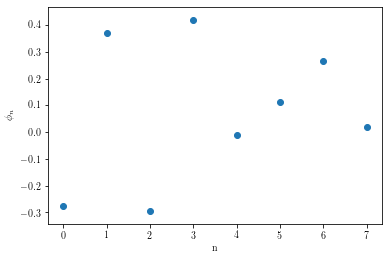

In [131]:
plt.scatter(range(len(x.state)), x.state)
plt.xlabel('n')
plt.ylabel('$\phi_n$')
plt.show()

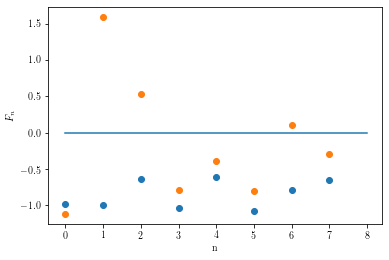

In [132]:
plt.scatter(range(len(phi)), x.dae().state)
plt.scatter(range(len(phi)), y.dae().state)
plt.xlabel('n')
plt.ylabel('$F_n$')
plt.plot([0,8], [0,0])
plt.show()

In [133]:
x.residual()

3.0218280982412784

In [134]:
tol = 1e-14

In [135]:
x.residual()

3.0218280982412784

In [154]:
dx = solve(x.jacobian(), -1.0*x.dae().state)

In [155]:
dx_orbit = x.from_numpy_array(dx)

In [156]:
(x + dx_orbit).residual()

2.866007977481358

In [139]:
x = x + dx_orbit

In [128]:
x.residual()

2.7987605923376555

In [94]:
y.residual()

2.7987605923376555

In [24]:
np.random.seed(99)
phi = (np.random.rand(8))-0.5
x = OrbitHN(state=np.array(phi), parameters=(1, 1))

[]

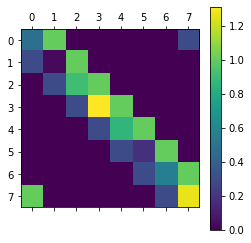

In [26]:
plt.matshow(np.abs(x.jacobian()))
plt.colorbar()
plt.plot()

In [ ]:
x.residual()

In [66]:
y = x.from_numpy_array(np.array([0,0,0,0,0,0,0,0]))

In [71]:
from scipy.linalg import solve

$J x = -F$

array([ -7.55526709,   8.95853388,   7.16767076, -53.11361449,
       -36.82722535,  -2.92151418,  -0.99141736,  -5.31781198])

In [70]:
y.residual()

4.0

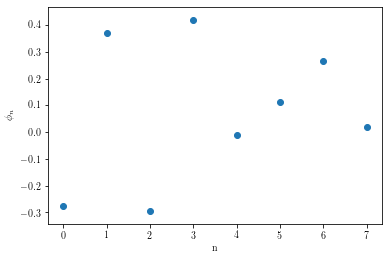

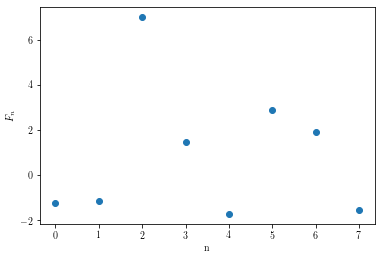

array([-1.21982124, -1.13473879,  7.01686548,  1.48685885, -1.71001642,
        2.88832464,  1.91735711, -1.55155314])

In [10]:
OrbitKS(nonzero_parameters=True)

OrbitKS({"basis": "modes", "parameters": ["128.8893", "62.7421", "0"], "field_shape": ["64", "64"]})